# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# Bussiness Goel
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [51]:
# Import Required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#importing visualization libraries
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import seaborn as sns  #visualization

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso


pd.set_option("display.max_columns", 200)   # setting max columns view
pd.set_option('display.max_rows', 200)       # setting 120 rows view

# Data Understanding and Prepration

In [52]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
# Get the shape of the columns
house_data.shape

(1460, 81)

In [56]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [57]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In Data analysis part , we will analyze below things 
1) Missing Values


In [58]:
## Missing Values 
house_data.isnull().sum()[house_data.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [59]:
## Droping columns (Alley, PoolQC , Fence , MiscFeature) due to very high missing valyes amlost more than 75%
house_data = house_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis='columns')


In [60]:
## Finding Missing Values again
house_data.isnull().sum()[house_data.isnull().sum() > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [61]:
# Replacing Nan values of MasVnrType with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [62]:
# Replacing Nan values of MasVnrArea with None i.e. With median of  Masonary area
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())

In [63]:
#replace Nan values of BsmtQual with NOT_PRESENT i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [64]:
#replace Nan values of BsmtCond with NOT_PRESENT i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [65]:
#replace Nan values of BsmtFinType1 with NOT_PRESENT i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [66]:
#replace Nan values of BsmtFinType2 with NOT_PRESENT i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [67]:
house_data.isnull().sum()[house_data.isnull().sum() > 0]

LotFrontage     259
BsmtExposure     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [68]:
#replace Nan values of BsmtExposure with NOT_PRESENT i.e. No Basement
house_data.BsmtExposure = house_data.BsmtExposure.fillna('NA')

In [69]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0]) 

In [70]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [71]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [72]:
#replace Nan values of GarageYrBlt with NA i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna('NA')

In [73]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [74]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [75]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [76]:
# Replacing Nan values of LotFrontage with median of  LotFrontage 
house_data.LotFrontage = house_data.LotFrontage.fillna(house_data.LotFrontage.median())

In [77]:
house_data.isnull().sum()[house_data.isnull().sum() > 0]

Series([], dtype: int64)

In [78]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Checking Outliers for continuous variables 

<AxesSubplot:title={'center':'LotFrontage'}>

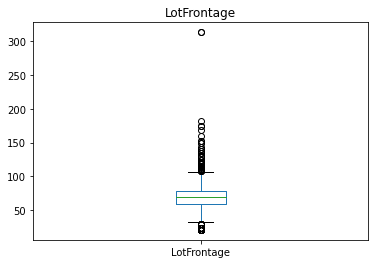

In [79]:
house_data.LotFrontage.plot(kind='box', title='LotFrontage')


###  Univariate analysis for each numerical column and analyze them

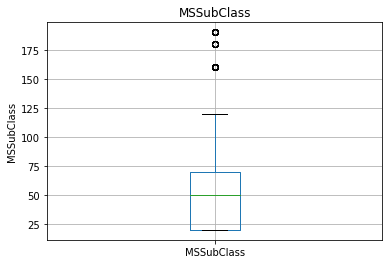

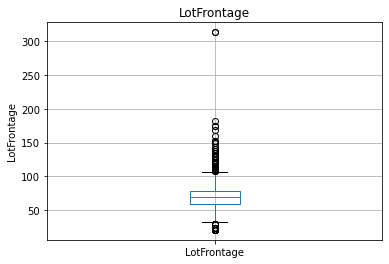

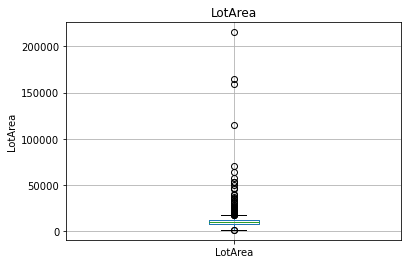

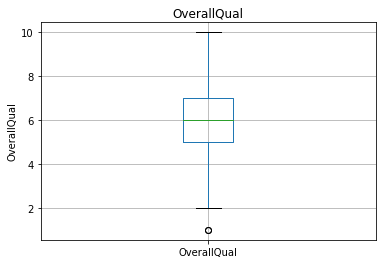

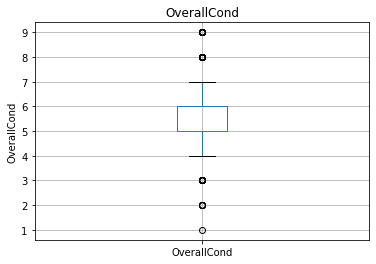

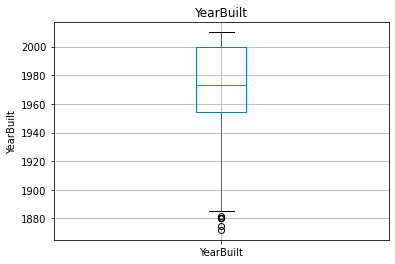

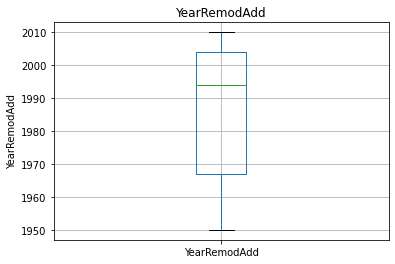

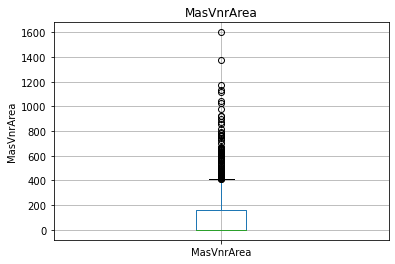

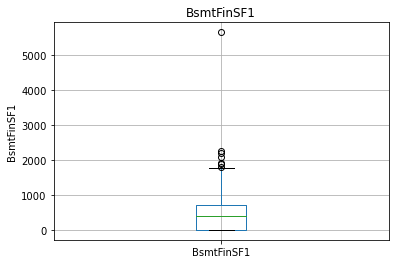

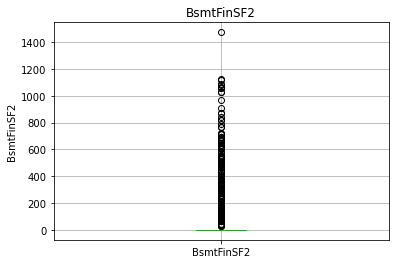

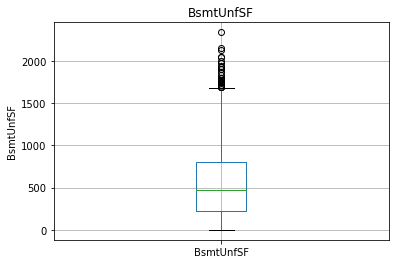

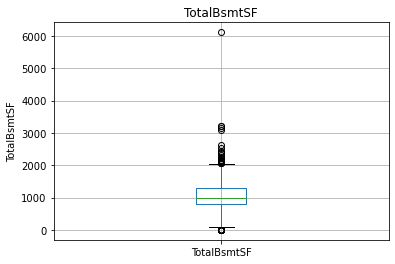

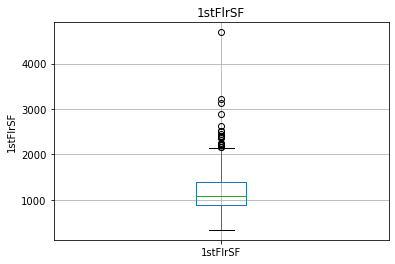

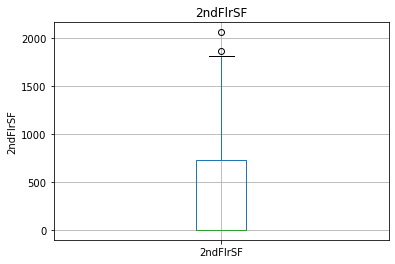

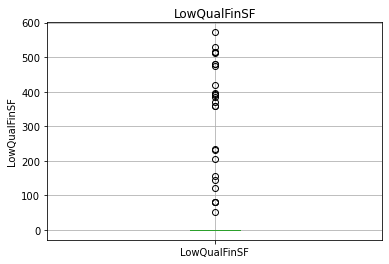

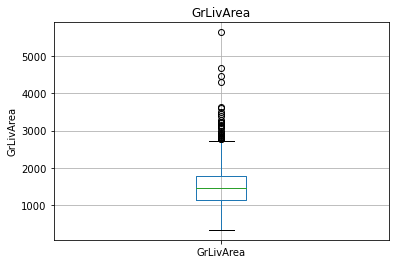

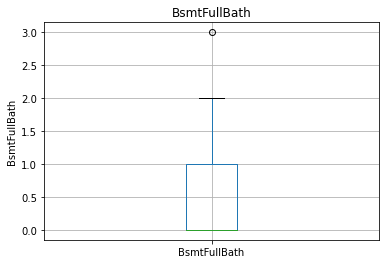

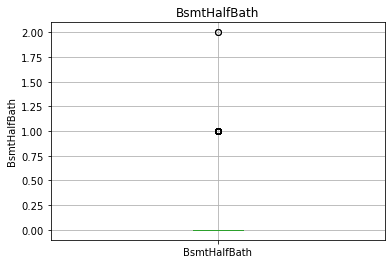

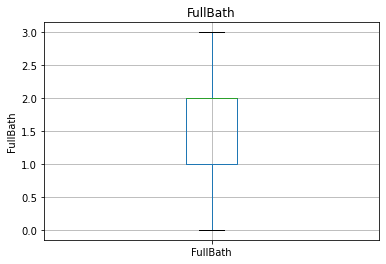

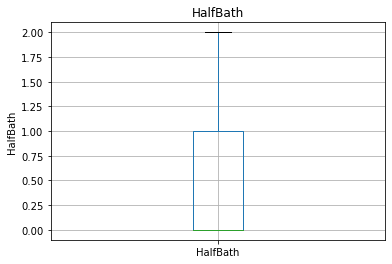

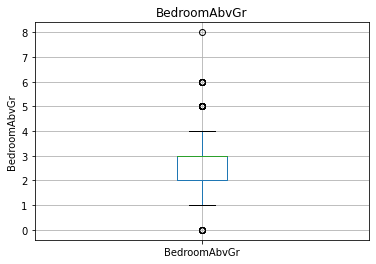

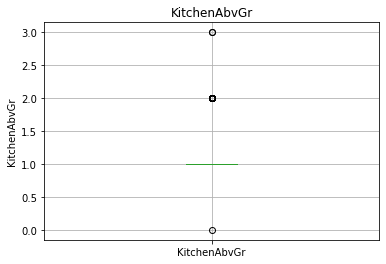

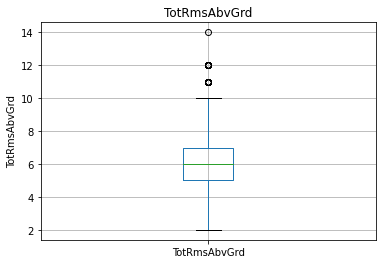

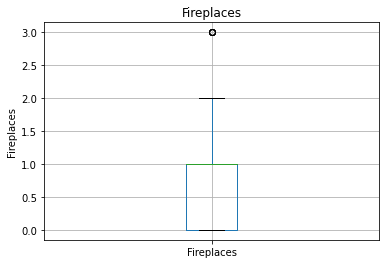

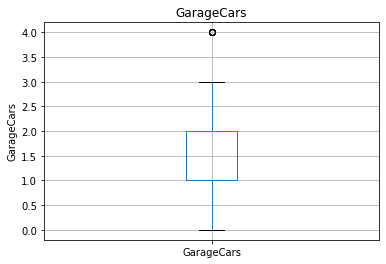

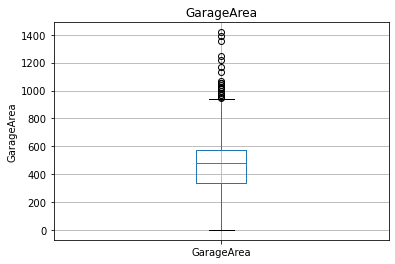

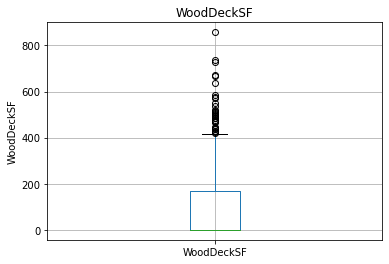

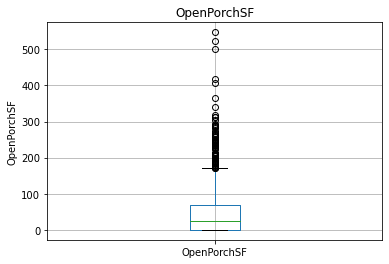

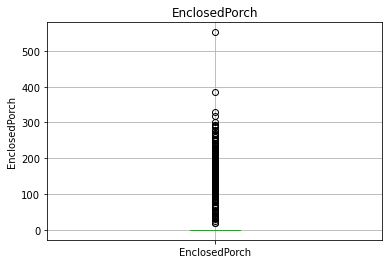

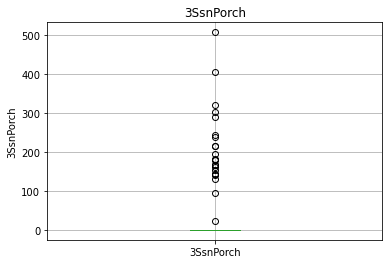

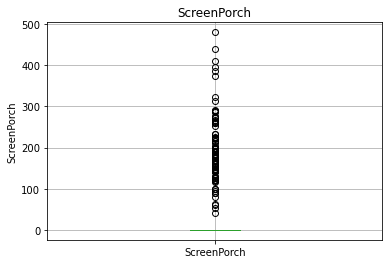

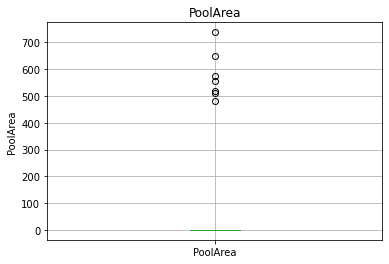

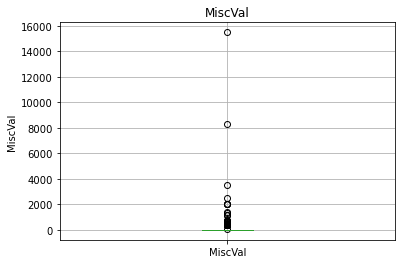

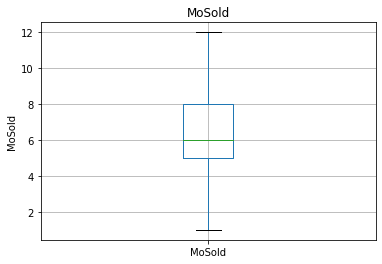

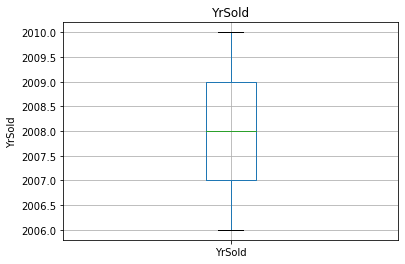

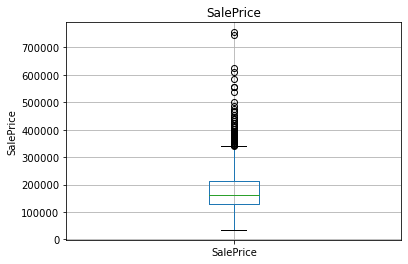

In [80]:


num_col = list(house_data.dtypes[house_data.dtypes !='object'].index)
for x in num_col:
    if x == 'Id':
        pass
    else:
        house_data.boxplot(column=x)
        plt.ylabel(x)
        plt.title(x)
        plt.show()

### Analyzing Highly biased variables which contains more than 85% os same value data. We need to drop those columns as this data will not add impact to our analysis.


In [81]:
### Analyzing Numeric columns first for Highly biased data
num_col = list(house_data.dtypes[house_data.dtypes !='object'].index)
print(num_col)
for x in num_col:
    print("Variable name", x)
    print(house_data[x].value_counts())

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Variable name Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
Variable name MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Variable name LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0  

In [82]:
### From above analysis we can say that from Numerical columns we need to drop below variables which are highly biased.
###['LowQualFinSF','BsmtFinSF2','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
house_data = house_data.drop(['LowQualFinSF','BsmtFinSF2','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis='columns')
house_data.shape

(1460, 68)

In [83]:
### Analyzing Categorical columns for Highly biased data
num_col = list(house_data.dtypes[house_data.dtypes =='object'].index)
print(num_col)
for x in num_col:
    print("Variable name", x)
    print(house_data[x].value_counts())

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Variable name MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Variable name Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Variable name LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Variable name LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Variable name Utilities
AllPub    1459
N

In [84]:
### From above analysis we can say that from Numerical columns we need to drop below variables which are highly biased.
###['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','PavedDrive']
house_data = house_data.drop(['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','PavedDrive'],axis='columns')
house_data.shape

(1460, 52)

In [85]:
# Now dropping ID column as we dont need ID for our prediction 
house_data = house_data.drop(['Id'],axis='columns')
house_data.shape

(1460, 51)

In [86]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [87]:
house_data.MSSubClass

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object

### OUTLIERS TREATEMENT

In [88]:
#### We have many below mentioned variables which contains outliers. We need to handle these outliers by replacing outlier values
### with upper and lower limit.
outlier_variables = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF']
for x in outlier_variables:
    print("Variable name", x)
    print(house_data[x].describe())

Variable name LotFrontage
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
Variable name LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
Variable name MasVnrArea
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
Variable name BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
Variable name BsmtUnfSF
count    1460.000000
mean      567.240411
std       441.8669

In [89]:
### We can clearly see outlier values from above command. Now we need to handle these oulier variables.
outlier_variables = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF']
for i in outlier_variables:
    Q3 = house_data[i].quantile(.75)
    Q1 = house_data[i].quantile(.25)
    IQR = Q3 - Q1
    Max_Lim = Q3 + (1.5 * IQR)
    Min_Lim = Q1 - (1.5 * IQR)
    print("Q3 is ", Q3)
    print("Q1 is ", Q1)
    print("IQR is ", IQR)
    print("Max_Lim is ", Max_Lim)
    print("Min_Lim is ", Min_Lim)
    print("variable name is ",i)
    house_data[i]=house_data[i].apply(lambda x : x if x < Max_Lim else Max_Lim )
    house_data[i]=house_data[i].apply(lambda x : x if x > Min_Lim else Min_Lim )

Q3 is  79.0
Q1 is  60.0
IQR is  19.0
Max_Lim is  107.5
Min_Lim is  31.5
variable name is  LotFrontage
Q3 is  11601.5
Q1 is  7553.5
IQR is  4048.0
Max_Lim is  17673.5
Min_Lim is  1481.5
variable name is  LotArea
Q3 is  164.25
Q1 is  0.0
IQR is  164.25
Max_Lim is  410.625
Min_Lim is  -246.375
variable name is  MasVnrArea
Q3 is  712.25
Q1 is  0.0
IQR is  712.25
Max_Lim is  1780.625
Min_Lim is  -1068.375
variable name is  BsmtFinSF1
Q3 is  808.0
Q1 is  223.0
IQR is  585.0
Max_Lim is  1685.5
Min_Lim is  -654.5
variable name is  BsmtUnfSF
Q3 is  1298.25
Q1 is  795.75
IQR is  502.5
Max_Lim is  2052.0
Min_Lim is  42.0
variable name is  TotalBsmtSF
Q3 is  1391.25
Q1 is  882.0
IQR is  509.25
Max_Lim is  2155.125
Min_Lim is  118.125
variable name is  1stFlrSF
Q3 is  728.0
Q1 is  0.0
IQR is  728.0
Max_Lim is  1820.0
Min_Lim is  -1092.0
variable name is  2ndFlrSF
Q3 is  1776.75
Q1 is  1129.5
IQR is  647.25
Max_Lim is  2747.625
Min_Lim is  158.625
variable name is  GrLivArea
Q3 is  7.0
Q1 is  5.0
IQ

In [90]:
### Analyzing variables after handling outliers 
outlier_variables = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF']
for x in outlier_variables:
    print("Variable name", x)
    print(house_data[x].describe())

Variable name LotFrontage
count    1460.000000
mean       69.090411
std        17.231909
min        31.500000
25%        60.000000
50%        69.000000
75%        79.000000
max       107.500000
Name: LotFrontage, dtype: float64
Variable name LotArea
count     1460.000000
mean      9647.388014
std       3594.356399
min       1481.500000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      17673.500000
Name: LotArea, dtype: float64
Variable name MasVnrArea
count    1460.000000
mean       89.406336
std       134.017553
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max       410.625000
Name: MasVnrArea, dtype: float64
Variable name BsmtFinSF1
count    1460.000000
mean      439.997517
std       433.219435
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      1780.625000
Name: BsmtFinSF1, dtype: float64
Variable name BsmtUnfSF
count    1460.000000
mean      563.777740
std       431.710214
min  

### Now we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

TypeError: '>=' not supported between instances of 'float' and 'str'

In [91]:
year_val = 0
house_data.GarageYrBlt = house_data.GarageYrBlt.apply(lambda x : x if x!='NA' else year_val)

In [92]:
house_data.GarageYrBlt.value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1958.0    21
2009.0    21
1962.0    21
1965.0    21
1966.0    21
1970.0    20
2001.0    20
1957.0    20
1996.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1995.0    18
1964.0    18
1974.0    18
1994.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0     5
1916.0     5
1936.0     5
1945.0     4
1931.0     4
1982.0     4
1928.0     4
1935.0     4
1946.0     4

In [93]:
house_data['YearBuilt_Updated'] = house_data.YearBuilt.max()-house_data.YearBuilt
house_data['YearRemodAdd_Updated'] = house_data.YearRemodAdd.max()-house_data.YearRemodAdd
house_data['GarageYrBlt_Updated'] = house_data.GarageYrBlt.max()-house_data.GarageYrBlt
house_data['YrSold_Updated'] = house_data.YrSold.max()-house_data.YrSold
house_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Updated','YearRemodAdd_Updated',
             'GarageYrBlt_Updated','YrSold_Updated']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Updated,YearRemodAdd_Updated,GarageYrBlt_Updated,YrSold_Updated
0,2003,2003,2003.0,2008,7,7,7.0,2
1,1976,1976,1976.0,2007,34,34,34.0,3
2,2001,2002,2001.0,2008,9,8,9.0,2
3,1915,1970,1998.0,2006,95,40,12.0,4
4,2000,2000,2000.0,2008,10,10,10.0,2
...,...,...,...,...,...,...,...,...
1455,1999,2000,1999.0,2007,11,10,11.0,3
1456,1978,1988,1978.0,2010,32,22,32.0,0
1457,1941,2006,1941.0,2010,69,4,69.0,0
1458,1950,1996,1950.0,2010,60,14,60.0,0


In [94]:
house_data = house_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [95]:
house_data = house_data.drop(['Id'],axis='columns')

KeyError: "['Id'] not found in axis"

In [96]:
# Converting some of numerical columns to categorical columns as per data dictionary these are categorical columns.
numerical_to_cat = ['OverallQual', 'OverallCond', 'MoSold']

for x in numerical_to_cat:
    house_data[x] = house_data[x].astype(object)

In [97]:
#Numerical variables finaly are 
num_col = list(house_data.dtypes[house_data.dtypes !='object'].index)
print(num_col)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'YearBuilt_Updated', 'YearRemodAdd_Updated', 'GarageYrBlt_Updated', 'YrSold_Updated']


In [98]:
#Categorical variables finaly are 
num_col = list(house_data.dtypes[house_data.dtypes =='object'].index)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'MoSold', 'SaleType', 'SaleCondition']


In [111]:
house_data.shape

(1460, 48)

# EDA Analysis
# Bivariate analysis 
### Univariate analysis already completed

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'YearBuilt_Updated', 'YearRemodAdd_Updated', 'GarageYrBlt_Updated', 'YrSold_Updated']


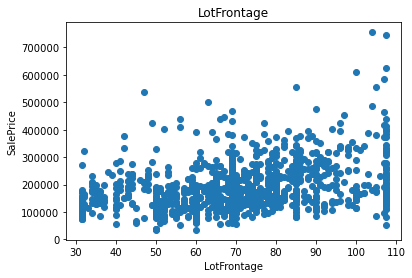

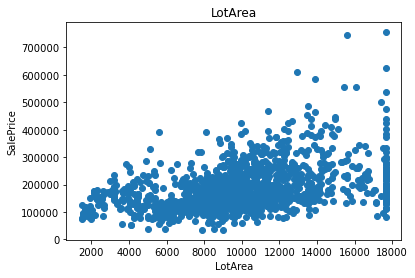

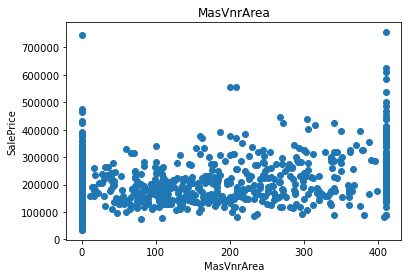

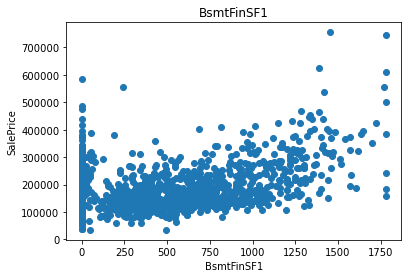

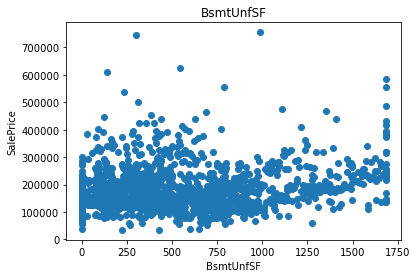

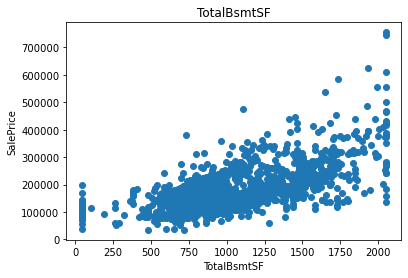

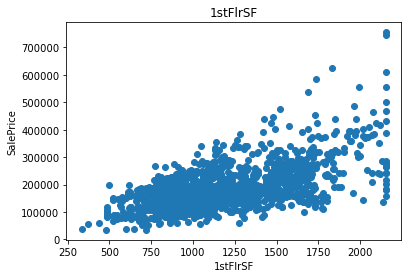

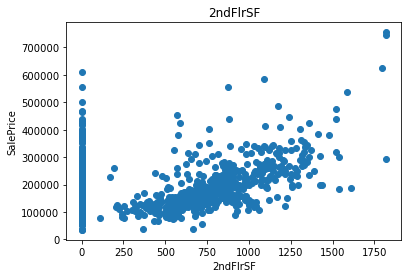

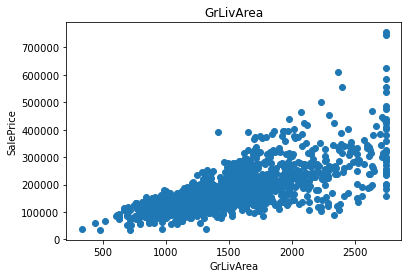

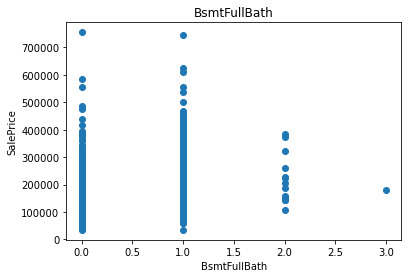

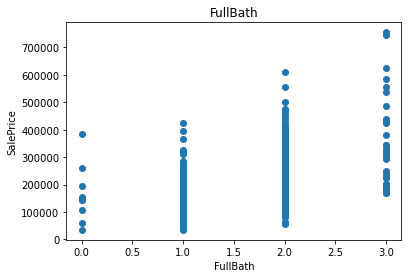

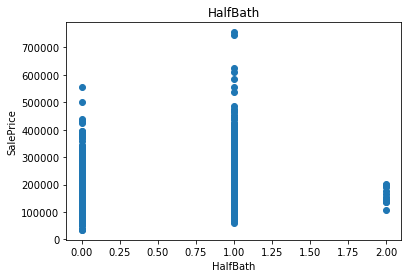

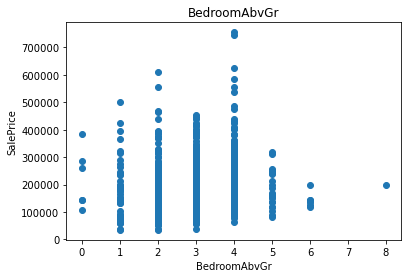

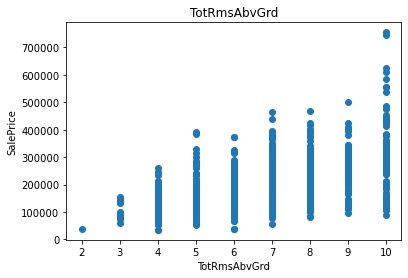

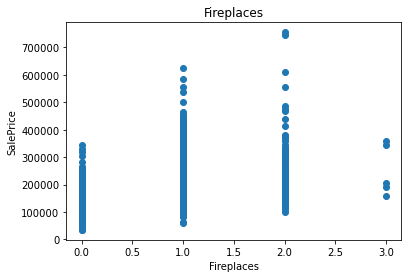

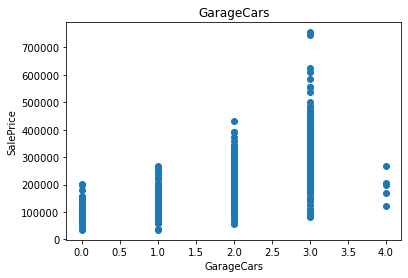

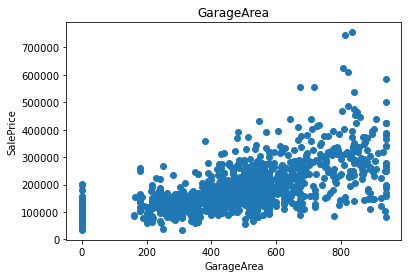

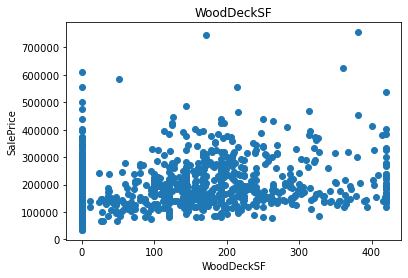

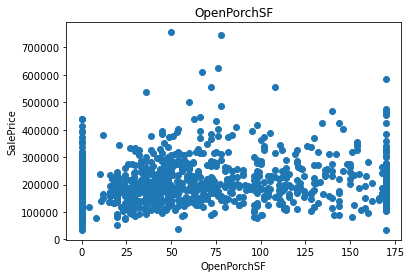

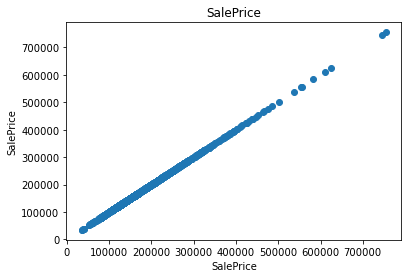

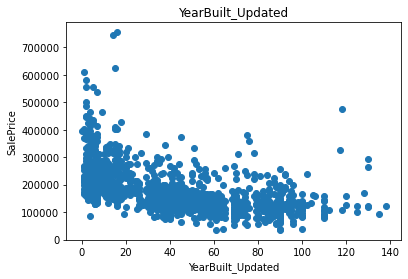

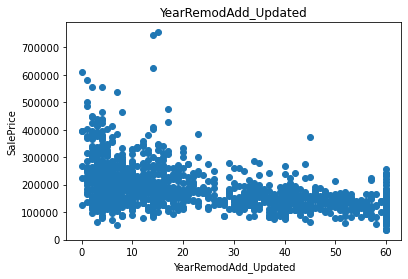

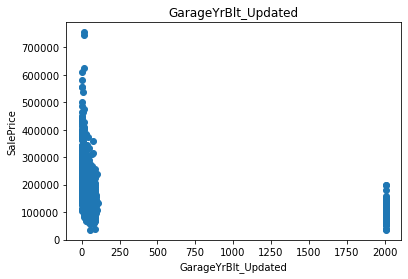

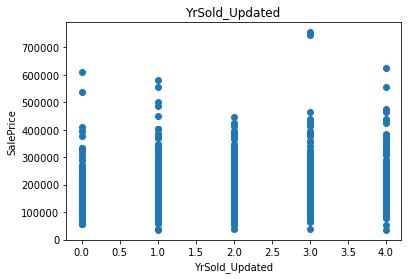

In [100]:
### 1)  Analysing relationship between Continuous Variabless with 'SalePrice'
num_col = list(house_data.dtypes[house_data.dtypes !='object'].index)
print(num_col)
for feature in num_col:
    plt.scatter(house_data[feature],house_data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    
    


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'YearBuilt_Updated', 'YearRemodAdd_Updated', 'GarageYrBlt_Updated', 'YrSold_Updated']


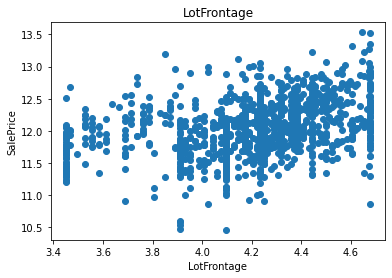

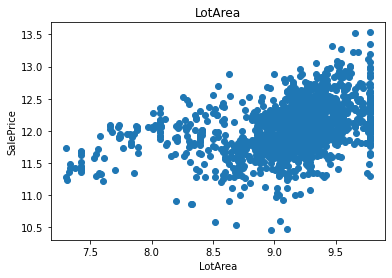

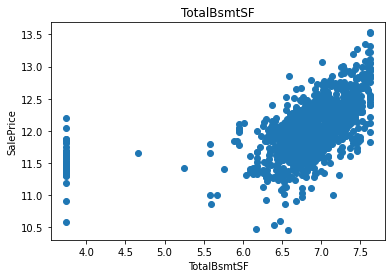

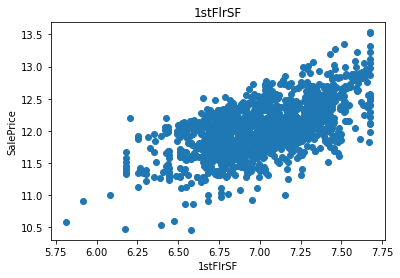

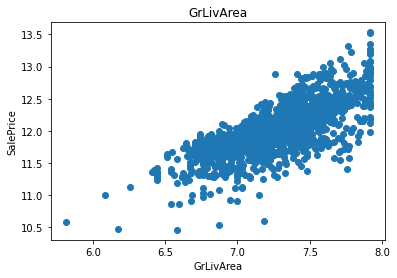

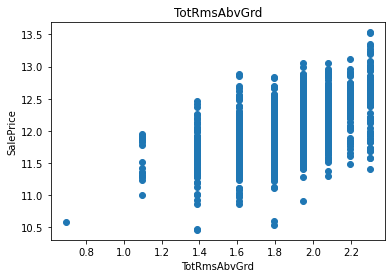

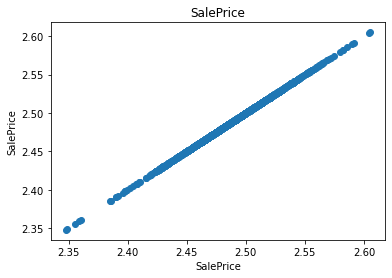

In [101]:
### 2) Analysing relationship between Logarithmic transformed Continuous Variabless with 'SalePrice'
num_col = list(house_data.dtypes[house_data.dtypes !='object'].index)
print(num_col)
for feature in num_col:    
    house_data_copied = house_data.copy()
    if 0 in house_data_copied[feature].unique():
        pass
    else:
        house_data_copied[feature] = np.log(house_data_copied[feature])
        house_data_copied['SalePrice'] = np.log(house_data_copied['SalePrice'])
        plt.scatter(house_data_copied[feature],house_data_copied['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()
    
    


['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'MoSold', 'SaleType', 'SaleCondition']


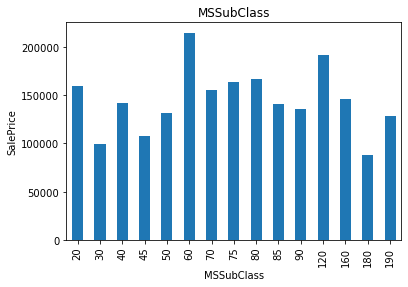

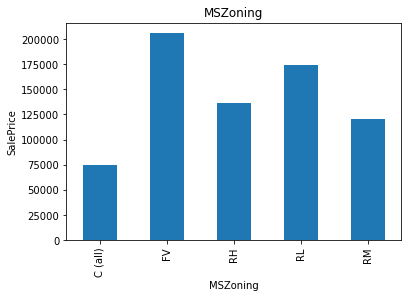

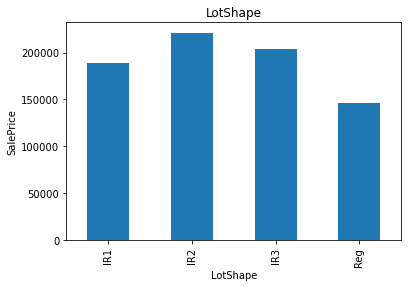

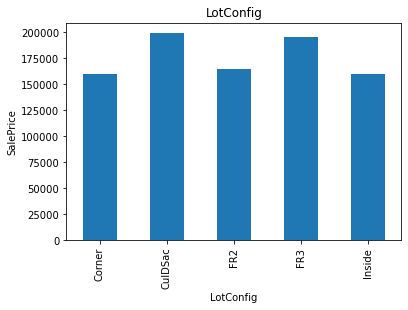

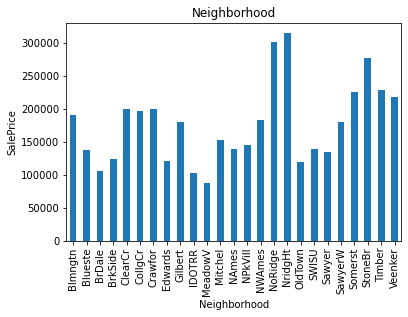

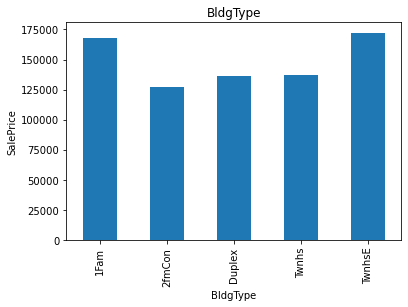

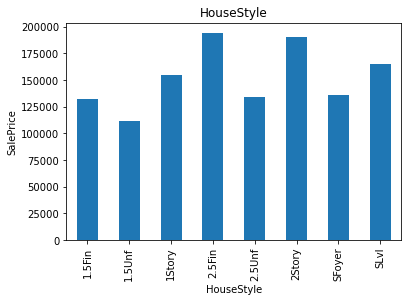

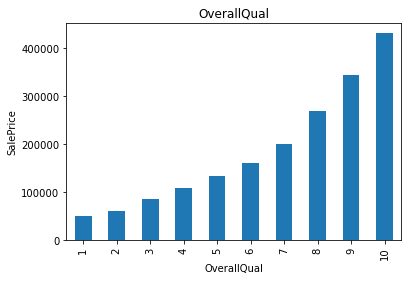

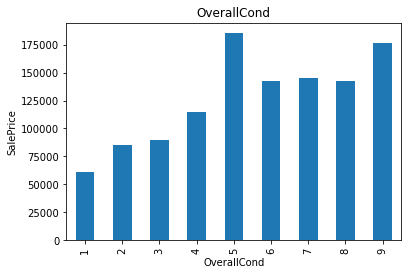

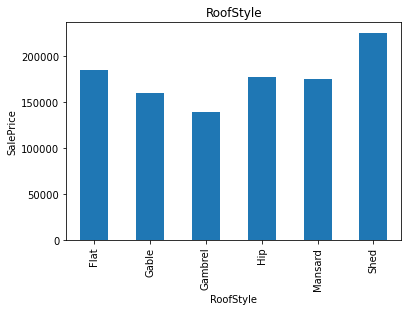

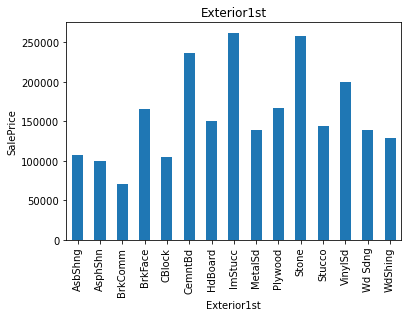

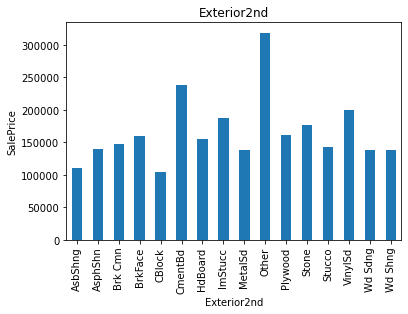

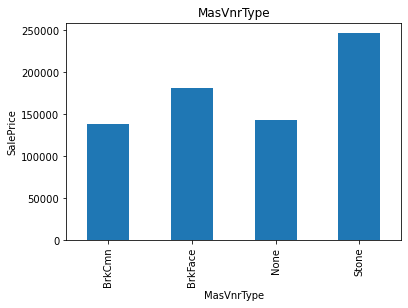

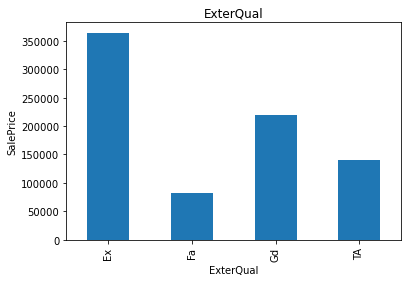

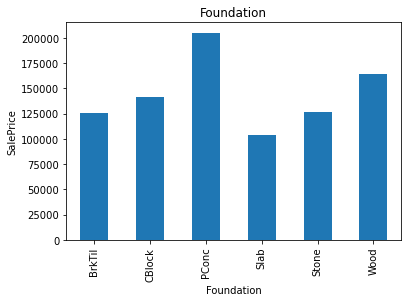

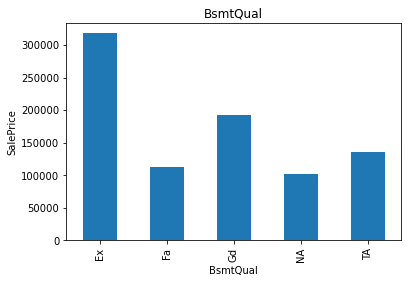

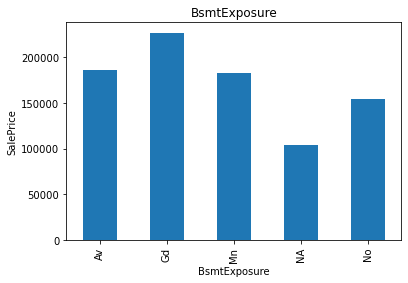

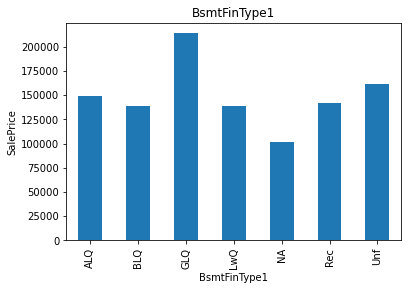

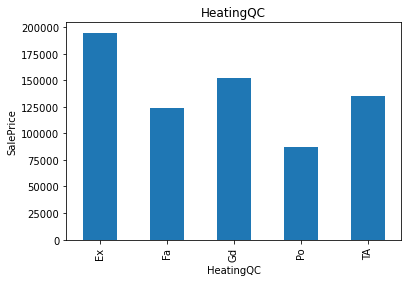

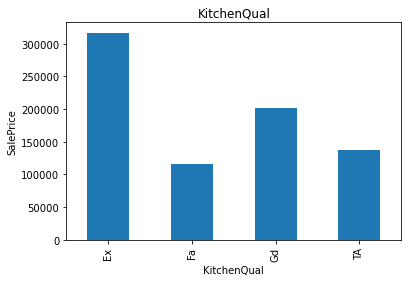

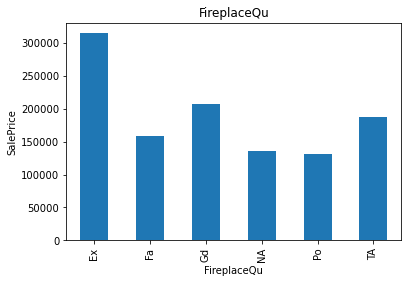

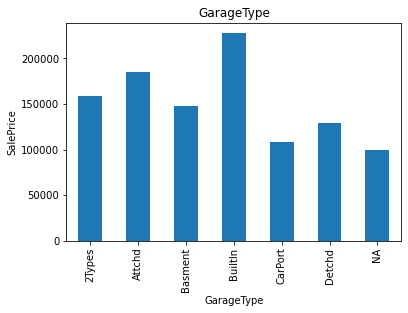

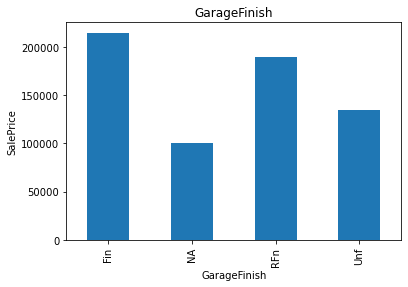

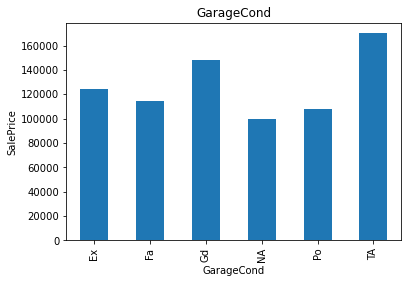

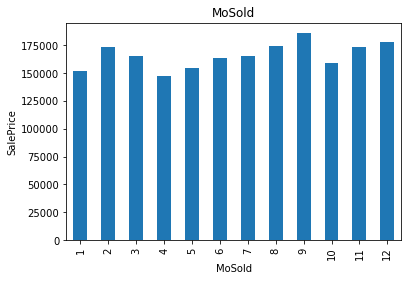

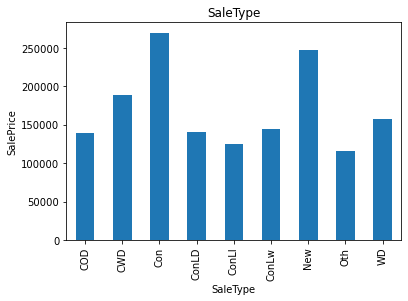

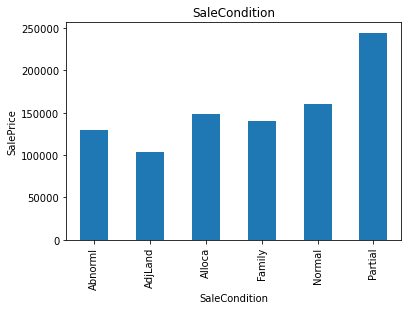

In [102]:
### 3) Analysing relationship between Categorical Variabless with 'SalePrice'


categorical_col = list(house_data.dtypes[house_data.dtypes =='object'].index)
print(categorical_col)
for feature in categorical_col:
    house_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Observations of Categorical variables analysis:
We can conclude that quality of some features increases, the target variable, saleprice of the house also increases. 
In many  ordered categorical variable, the poor has lowest price and excellent has highest price.

## Multivariate analysis

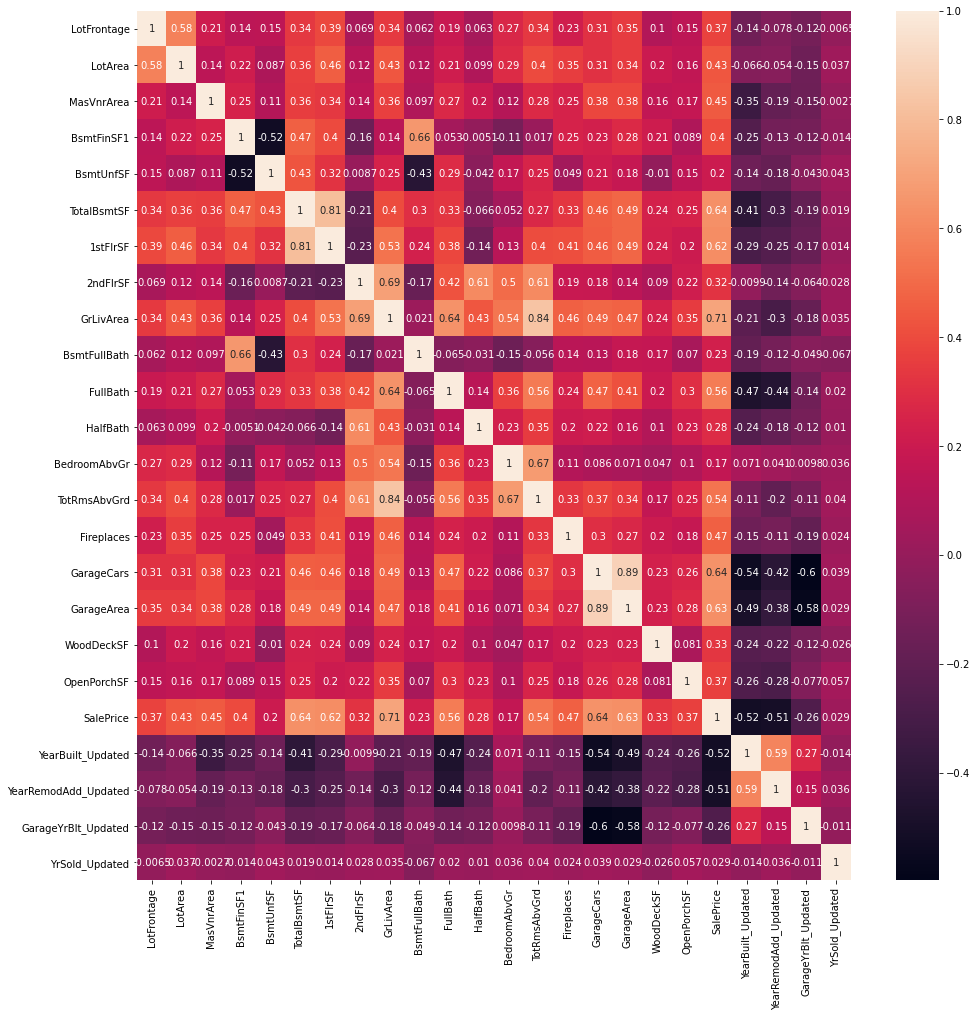

In [103]:
#### 4) Plotting heatmap to check the corellation between varables
plt.figure(figsize=(16,16))
sns.heatmap(house_data[list(house_data.dtypes[house_data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

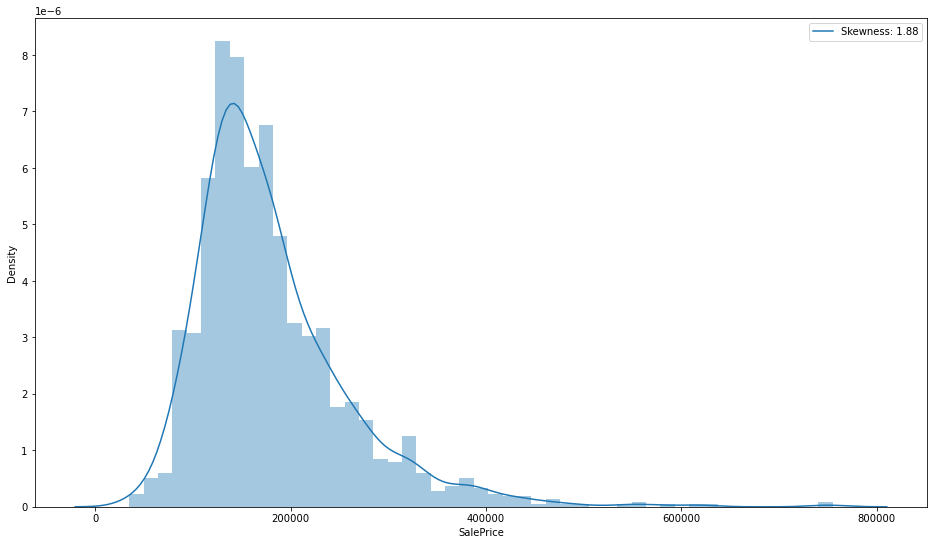

In [104]:
## Distplot
# distplot of the target variable

plt.figure(figsize=(16,9))
bar = sns.distplot(house_data['SalePrice'])
bar.legend(["Skewness: {:.2f}".format(house_data['SalePrice'].skew())])
plt.show()

<AxesSubplot:title={'center':'Correlated with SalePrice'}>

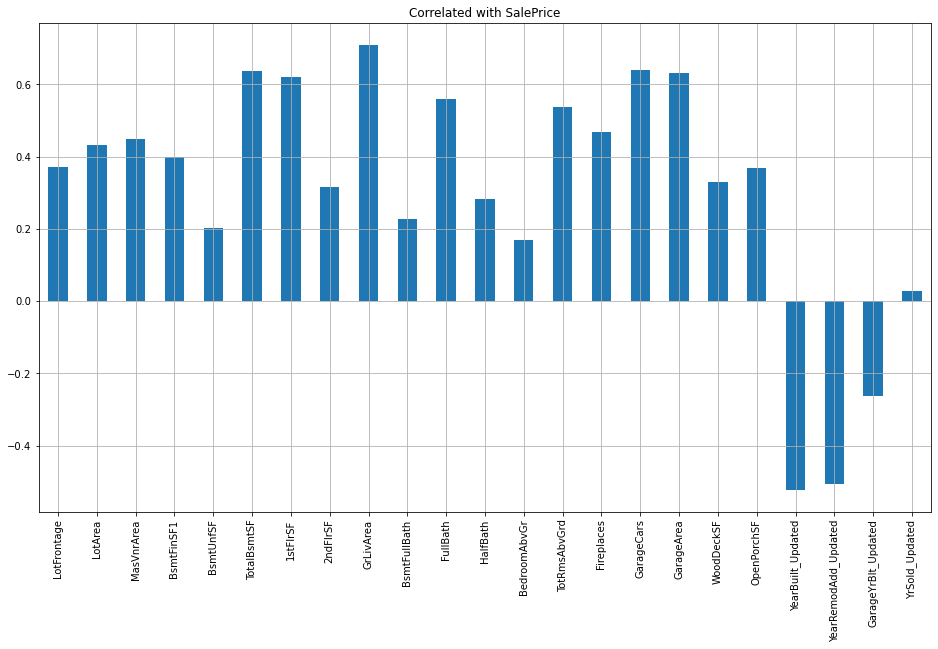

In [105]:
## Correlation matrix
dataset_copy = house_data.drop(columns='SalePrice')
dataset_copy.corrwith(house_data['SalePrice']).plot.bar(
    figsize=(16,9), title='Correlated with SalePrice', grid=True
)

### Observations
As we can see, almost all the numerical variables have some sort of correlation with the target variable.
Here we can clearly see that Variables TotalBsmtSF, 1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,
GarageArea  are highly positivity related with SalePrice variable 
Variable : YearBuilt, YearRemodAdd, GarageYrBlt are negatively correlated with SalePrice variable.

In [110]:
### We need to remove some highly correlated variables because those are highly correlated with other variables as seen in Heat map
### Variables are : 'TotRmsAbvGrd', 'GarageCars', 'OpenPorchSF'
remove_corr_var = ['TotRmsAbvGrd', 'GarageCars', 'OpenPorchSF']
house_data = house_data.drop(columns=remove_corr_var)
house_data.shape


(1460, 48)

In [112]:
#Numerical variables finaly are 
num_col = list(house_data.dtypes[house_data.dtypes !='object'].index)
print(num_col)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'SalePrice', 'YearBuilt_Updated', 'YearRemodAdd_Updated', 'GarageYrBlt_Updated', 'YrSold_Updated']


In [128]:
#categorical variables finaly are 
num_col = list(house_data.dtypes[house_data.dtypes =='object'].index)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'MoSold', 'SaleType', 'SaleCondition']


In [252]:
house_data_back = house_data.copy()

In [253]:
### To analyze logarithmic view of salesprice variable , we need to create copy data and anaylyze on that.
house_data_back['SalePrice'] = np.log(house_data_back['SalePrice'])
house_data_back['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

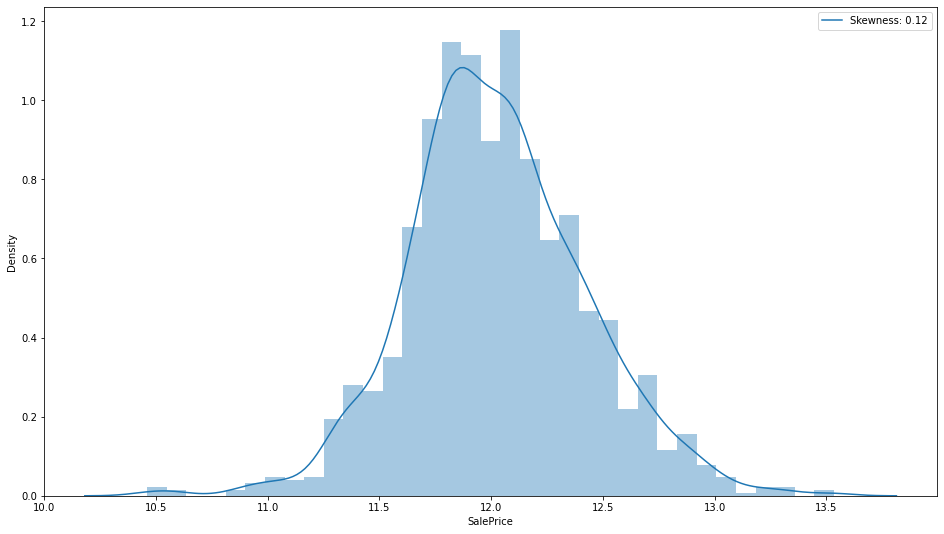

In [254]:
## Distplot
# distplot of the target variable

plt.figure(figsize=(16,9))
bar = sns.distplot(house_data_back['SalePrice'])
bar.legend(["Skewness: {:.2f}".format(house_data_back['SalePrice'].skew())])
plt.show()

### Data Handling operations 
Now we will prepare our data for model building 

In [115]:
# First we need to convert OverallQual and OverallCond variables to float variable as we need not to create dummy variables for these
house_data.OverallQual = house_data.OverallQual.astype(float)

house_data.OverallCond = house_data.OverallCond.astype(float)

In [116]:
house_data.OverallQual

0       7.0
1       6.0
2       7.0
3       7.0
4       8.0
       ... 
1455    6.0
1456    6.0
1457    7.0
1458    5.0
1459    5.0
Name: OverallQual, Length: 1460, dtype: float64

In [117]:
house_data.OverallCond

0       5.0
1       8.0
2       5.0
3       5.0
4       5.0
       ... 
1455    5.0
1456    6.0
1457    9.0
1458    6.0
1459    6.0
Name: OverallCond, Length: 1460, dtype: float64

In [118]:
### Handling Ordered categorical variables.
# First we need to handle and Map ordered categorical variables to its corresponding values 
Ordered_categorical = ['ExterQual', 'HeatingQC', 'KitchenQual', 'BsmtQual','FireplaceQu','GarageCond']

# ExterQual


In [119]:
house_data.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [120]:
# Mapping all the Poor, Fair, Good, Typical/Average, Excellent with increasing order od numeric value
house_data['ExterQual'] = house_data.ExterQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [121]:
# HeatingQC
house_data.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [122]:
house_data['HeatingQC'] = house_data.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
house_data.HeatingQC.value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

In [123]:
#Handling KitchenQual
house_data.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [124]:
house_data['KitchenQual'] = house_data.KitchenQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
house_data.KitchenQual.value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

In [125]:
# Handling BsmtQual
house_data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [126]:
house_data['BsmtQual'] = house_data.BsmtQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA':0})
house_data.BsmtQual.value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [131]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   object 
 1   MSZoning              1460 non-null   object 
 2   LotFrontage           1460 non-null   float64
 3   LotArea               1460 non-null   float64
 4   LotShape              1460 non-null   object 
 5   LotConfig             1460 non-null   object 
 6   Neighborhood          1460 non-null   object 
 7   BldgType              1460 non-null   object 
 8   HouseStyle            1460 non-null   object 
 9   OverallQual           1460 non-null   float64
 10  OverallCond           1460 non-null   float64
 11  RoofStyle             1460 non-null   object 
 12  Exterior1st           1460 non-null   object 
 13  Exterior2nd           1460 non-null   object 
 14  MasVnrType            1460 non-null   object 
 15  MasVnrArea           

In [132]:
## Handling FireplaceQu
house_data.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [133]:
house_data['FireplaceQu'] = house_data.FireplaceQu.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA':0})
house_data.FireplaceQu.value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [134]:
## Handling GarageCond
house_data.GarageCond.value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [135]:
house_data['GarageCond'] = house_data.GarageCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA':0})
house_data.GarageCond.value_counts()

3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

In [136]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   object 
 1   MSZoning              1460 non-null   object 
 2   LotFrontage           1460 non-null   float64
 3   LotArea               1460 non-null   float64
 4   LotShape              1460 non-null   object 
 5   LotConfig             1460 non-null   object 
 6   Neighborhood          1460 non-null   object 
 7   BldgType              1460 non-null   object 
 8   HouseStyle            1460 non-null   object 
 9   OverallQual           1460 non-null   float64
 10  OverallCond           1460 non-null   float64
 11  RoofStyle             1460 non-null   object 
 12  Exterior1st           1460 non-null   object 
 13  Exterior2nd           1460 non-null   object 
 14  MasVnrType            1460 non-null   object 
 15  MasVnrArea           

In [137]:
#categorical variables finaly are 
num_col = list(house_data.dtypes[house_data.dtypes =='object'].index)
print(num_col)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'GarageType', 'GarageFinish', 'MoSold', 'SaleType', 'SaleCondition']


# Unordered categorical vairables 

In [138]:
## Below are the variables which needs to be encoded 
Cat_Encode_Dummy = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'GarageType', 'GarageFinish', 'MoSold', 'SaleType', 'SaleCondition']


In [139]:
# create the dummy variable for the remaining categorical variables and merge them with our main dataset
total_dummies_counter = 0
for i in Cat_Encode_Dummy:
    dummy = pd.get_dummies(house_data[i], prefix=i, drop_first = True)
    total_dummies_counter = total_dummies_counter + dummy.shape[1]
    house_data = pd.concat([house_data, dummy], axis = 1)
    house_data.drop(columns=[i], inplace=True)
print('total dummies count = ', total_dummies_counter)
print(house_data.shape)

total dummies count =  145
(1460, 174)


In [141]:
house_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageCond,WoodDeckSF,SalePrice,YearBuilt_Updated,YearRemodAdd_Updated,GarageYrBlt_Updated,YrSold_Updated,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,196.0,4,4,706.0,150.0,856.0,5,856.0,854.0,1710.0,1,2,1,3,4,0,0,548.0,3,0.0,208500,7,7,7.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,6.0,8.0,0.0,3,4,978.0,284.0,1262.0,5,1262.0,0.0,1262.0,0,2,0,3,3,1,3,460.0,3,298.0,181500,34,34,34.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,7.0,5.0,162.0,4,4,486.0,434.0,920.0,5,920.0,866.0,1786.0,1,2,1,3,4,1,3,608.0,3,0.0,223500,9,8,9.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [142]:
### Now as we already seen that our Target variable is little skewed. So we will take Log transform into original data of Salesprice
house_data['SalePrice'] = np.log(house_data['SalePrice'])
house_data['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# Model Building Using Linear regressiion, Ridge and Lasso model validations 

In [143]:
house_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageCond,WoodDeckSF,SalePrice,YearBuilt_Updated,YearRemodAdd_Updated,GarageYrBlt_Updated,YrSold_Updated,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,196.0,4,4,706.0,150.0,856.0,5,856.0,854.0,1710.0,1,2,1,3,4,0,0,548.0,3,0.0,12.247694,7,7,7.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,6.0,8.0,0.0,3,4,978.0,284.0,1262.0,5,1262.0,0.0,1262.0,0,2,0,3,3,1,3,460.0,3,298.0,12.109011,34,34,34.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,7.0,5.0,162.0,4,4,486.0,434.0,920.0,5,920.0,866.0,1786.0,1,2,1,3,4,1,3,608.0,3,0.0,12.317167,9,8,9.0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,

In [145]:
house_data.iloc[:,0:29].head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageCond,WoodDeckSF,SalePrice,YearBuilt_Updated,YearRemodAdd_Updated,GarageYrBlt_Updated,YrSold_Updated
0,65.0,8450.0,7.0,5.0,196.0,4,4,706.0,150.0,856.0,5,856.0,854.0,1710.0,1,2,1,3,4,0,0,548.0,3,0.0,12.247694,7,7,7.0,2
1,80.0,9600.0,6.0,8.0,0.0,3,4,978.0,284.0,1262.0,5,1262.0,0.0,1262.0,0,2,0,3,3,1,3,460.0,3,298.0,12.109011,34,34,34.0,3
2,68.0,11250.0,7.0,5.0,162.0,4,4,486.0,434.0,920.0,5,920.0,866.0,1786.0,1,2,1,3,4,1,3,608.0,3,0.0,12.317167,9,8,9.0,2
3,60.0,9550.0,7.0,5.0,0.0,3,3,216.0,540.0,756.0,4,961.0,756.0,1717.0,1,1,0,3,4,1,4,642.0,3,0.0,11.849398,95,40,12.0,4
4,84.0,14260.0,8.0,5.0,350.0,4,4,655.0,490.0,1145.0,5,1145.0,1053.0,2198.0,1,2,1,4,4,1,3,836.0,3,192.0,12.429216,10,10,10.0,2


In [146]:
# Will split the data into 70, 30 ratio to test Linear regresson model 
df_train, df_test = train_test_split(house_data, train_size=.7, random_state=100)

In [147]:
# Now we will use here MinMax scaler to scale our first 29 variables 
scaler = MinMaxScaler()

df_train.iloc[:, 0:29] = scaler.fit_transform(df_train.iloc[:, 0:29])
df_test.iloc[:, 0:29] = scaler.transform(df_test.iloc[:, 0:29])

In [148]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageCond,WoodDeckSF,SalePrice,YearBuilt_Updated,YearRemodAdd_Updated,GarageYrBlt_Updated,YrSold_Updated,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.769737,0.519917,0.666667,0.500,0.62344,0.666667,0.8,0.554300,0.213586,0.649254,1.00,0.560813,0.700000,0.955999,0.333333,0.666667,0.5,0.500,0.666667,0.333333,0.6,0.699174,0.6,0.809524,0.653235,0.123188,0.283333,0.008458,0.25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
239,0.269737,0.448339,0.555556,0.375,0.00000,0.333333,0.6,0.052790,0.380303,0.344776,0.50,0.238906,0.378571,0.454186,0.000000,0.333333,0.5,0.375,0.333333,0.333333,0.8,0.234479,0.6,0.000000,0.382177,0.471014,1.000000,0.030348,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
986,0.361842,0.236444,0.555556,0.875,0.00000,0.333333,0.6,0.000000,0.287748,0.220398,0.75,0.352751,0.348352,0.518266,0.000000,0.333333,0.0,0.250,0.666667,0.000

In [149]:
df_train.shape

(1021, 174)

In [150]:
df_test.shape

(439, 174)

In [151]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageArea,GarageCond,WoodDeckSF,SalePrice,YearBuilt_Updated,YearRemodAdd_Updated,GarageYrBlt_Updated,YrSold_Updated,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.375000,0.464334,0.333333,0.625,0.000000,0.333333,0.6,0.345946,0.147137,0.408955,0.50,0.275920,0.000000,0.184446,0.000000,0.333333,0.0,0.375,0.333333,0.000000,0.0,0.562750,0.6,0.000000,0.403081,0.282609,0.650000,0.017910,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
57,0.756579,0.627687,0.666667,0.500,0.000000,0.666667,0.8,0.000000,0.510234,0.406965,1.00,0.273677,0.472527,0.555068,0.000000,0.666667,0.5,0.375,0.666667,0.000000,0.0,0.602185,0.6,0.000000,0.562149,0.043478,0.100000,0.002985,1.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
780,0.414474,0.394855,0.666667,0.500,0.092542,0.333333,0.8,0.000000,0.733907,0.594527,0.75,0.494076,0.000000,0.352871,0.000000,0.666667,0.0,0.375,0.333333,0.

In [152]:
# Seperating X and y for train and test
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

# Linear regression Model Evaluation

In [165]:
# Will use cross validation for linear regressin, Ridge, Lasso modeling 
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# tuning hyper parameters
hyper_params = [{'n_features_to_select': [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [0, 1, 5, 10, 20, 30, 40, 50,
                                                   60, 70, 80, 90, 100, 110,
                                                   120, 130, 140, 150, 160,
                                                   170]}],
             return_train_score=True, scoring='r2', verbose=1)

In [166]:
## Cross validation results 
cross_Val_results = pd.DataFrame(model_cv.cv_results_)
cross_Val_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.706264,0.011019,0.000000,0.000000,0,{'n_features_to_select': 0},NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
1,0.674279,0.015956,0.004666,0.000471,1,{'n_features_to_select': 1},0.093272,0.677799,0.657748,0.476273,0.270946,6,0.107625,0.647501,0.657873,0.471000,0.256980
2,0.664618,0.012721,0.004329,0.000472,5,{'n_features_to_select': 5},0.771305,0.846743,0.821103,0.813050,0.031319,5,0.787322,0.858898,0.853443,0.833221,0.032531
3,0.655290,0.003090,0.004665,0.000470,10,{'n_features_to_select': 10},0.867617,0.847228,0.831027,0.848624,0.014970,4,0.855835,0.872698,0.865021,0.864518,0.006893
4,0.653290,0.007712,0.004331,0.000471,20,{'n_features_to_select': 20},0.880915,0.867891,0.841319,0.863375,0.016477,3,0.897330,0.907072,0.909779,0.904727,0.005346


In [167]:
cross_Val_results.loc[:, ['param_n_features_to_select', 'mean_test_score', 'mean_train_score']]

,param_n_features_to_select,mean_test_score,mean_train_score
0,0,NaN,NaN
1,1,4.762727e-01,0.471000
2,5,8.130502e-01,0.833221
3,10,8.486241e-01,0.864518
4,20,8.633750e-01,0.904727
5,30,8.656306e-01,0.915092
6,40,-7.744942e+21,0.919698
7,50,8.635152e-01,0.923710
8,60,-1.791460e+22,0.925889
9,70,-1.021865e+22,0.929605


# Linear Regression Observations : 
As no. of features increases, Mean_test_score becoming more negative. Hence model is overfitted.

In [170]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)
print("R2 score train", r2_score_train)
print("R2 score test", r2_score_test)

R2 score train 0.9343097139945752
R2 score test -1.488786686272587e+23


# Ridge Modelling 

In [171]:
hyper_params = {'alpha': [ 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_reg = Ridge()

# cross validation
folds = 5 # for 5 folds
ridge_model_cv = GridSearchCV(estimator = ridge_reg, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [172]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
#ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,2.0,-0.023135,-0.027882,1
11,1.0,-0.022745,-0.027924,2
10,0.9,-0.022706,-0.027946,3
13,3.0,-0.023489,-0.027956,4
9,0.8,-0.022668,-0.027981,5
8,0.7,-0.022632,-0.028033,6
7,0.6,-0.022597,-0.028096,7
14,4.0,-0.023804,-0.028101,8
6,0.5,-0.022562,-0.028176,9
15,5.0,-0.024096,-0.028253,10


#### For alpha = 2, we have received our rank = 1 and will use same aplha for regularization purpose

In [173]:
# Will find best value of alpha and use same for model builting 
# Find best value for lambda and fit the model
alpha_value = ridge_model_cv.best_estimator_.alpha
print('Best value alpha is  ', alpha_value)

# Create Ridge object with this alpha
ridge = Ridge(alpha=alpha_value)

#Fit the model on train dataset
ridge.fit(X_train, y_train)

Best value alpha is   2.0


Ridge(alpha=2.0)

In [174]:
# Find the coeffieceinst
ridge.coef_

array([ 3.33377419e-03,  3.94943975e-02,  1.03870578e-01,  9.31057494e-02,
       -6.64887956e-04,  2.50943042e-03,  2.92957657e-02,  2.60636413e-02,
       -2.81655248e-03,  7.19300385e-02,  1.20936680e-02,  5.79478103e-02,
        5.37942574e-02,  9.18893460e-02,  2.42886729e-02,  2.87631353e-02,
        1.97499043e-02,  9.31307564e-03,  2.11785376e-02,  9.91212589e-04,
        2.11963366e-02,  4.08378703e-02,  2.70635444e-02,  1.05805203e-02,
       -4.79908270e-02, -2.28621641e-02,  1.97036513e-03,  6.02839121e-03,
       -2.85828682e-02, -1.38763356e-02, -1.07244459e-02,  2.88952767e-03,
       -2.85155173e-03,  1.54523520e-02,  9.85073138e-03, -9.24612021e-03,
        1.40254459e-03, -9.21370837e-03, -4.16206739e-03, -1.62480501e-02,
       -1.32644482e-02, -1.22154012e-02,  5.08479078e-02,  5.26379729e-02,
        5.06175059e-02,  4.19947492e-02,  4.03391231e-03, -2.37334019e-02,
        4.19007291e-03,  1.12344707e-02, -1.26369734e-02, -1.05672146e-02,
        9.42787859e-04,  

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

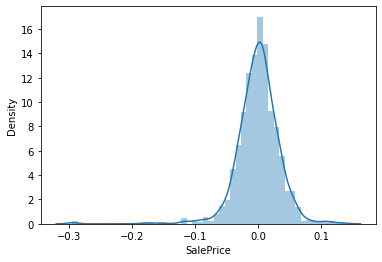

In [175]:
# Predicting RSS values for train and test 
y_train_pred =  ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
Residual = y_train-y_train_pred
sns.distplot(Residual)

In [176]:
# We can see that Residual graphs is normally distributed.

In [177]:
# r2 on train and test
R2_score_Train = r2_score(y_train, y_train_pred)
R2_score_Test = r2_score(y_test, y_test_pred)
print('r2 on train is ' ,R2_score_Train)
print('r2 on test is ' ,R2_score_Test)

r2 on train is  0.9304666209566664
r2 on test is  0.8864217722138876


#### R2 on train and test looks very good with very less difference in R2_test score value. Model looks good now not overfitted.

In [178]:
# Checking Mean squared error which should be less for a good model.
print('MSE_Train is', mean_squared_error(y_test, ridge.predict(X_test)))
print('MSE_Test is', mean_squared_error(y_train, ridge.predict(X_train)))

MSE_Train is 0.0019806979823192225
MSE_Test is 0.0011561632903075748


#### Mean squared error on test and train is very low which indicates of a good model.

### Checking best coefficients 


In [179]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df = ridge_df.sort_values(by = 'Coefficient', ascending=False)
ridge_df.head(15)

,Features,Coefficient
2,OverallQual,0.1039
3,OverallCond,0.0931
13,GrLivArea,0.0919
9,TotalBsmtSF,0.0719
11,1stFlrSF,0.0579
12,2ndFlrSF,0.0538
43,MSZoning_RH,0.0526
42,MSZoning_FV,0.0508
44,MSZoning_RL,0.0506
45,MSZoning_RM,0.0420


### Use RFE method to top 15 features.

In [211]:
Ridge_dict= dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
sorted(Ridge_dict.items(), key=lambda x: x[1], reverse=True)

X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)
def find(x):
    return Ridge_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

RFE_DF = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
RFE_DF = RFE_DF.loc[RFE_DF['rfe_support'] == True]
RFE_DF.reset_index(drop=True, inplace=True)

RFE_DF['Coefficient'] = RFE_DF['Features'].apply(find)
RFE_DF = RFE_DF.sort_values(by=['Coefficient'], ascending=False)
RFE_DF

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.1039
1,OverallCond,True,1,0.0931
2,GrLivArea,True,1,0.0919
3,TotalBsmtSF,True,1,0.0719
4,MSZoning_RH,True,1,0.0526
5,MSZoning_FV,True,1,0.0508
6,MSZoning_RL,True,1,0.0506
7,MSZoning_RM,True,1,0.0420
8,BsmtQual,True,1,0.0293
9,GarageFinish_NA,True,1,0.0040


#### Top 5 best features are : OverallQual , OverallCond,  GrLivArea, TotalBsmtSF, MSZoning_RH

# Lasso Model Building

In [200]:
lasso = Lasso()

hyper_params = {'alpha': [ 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score',
                  'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.001,-0.028824,-0.030154,1
1,0.01,-0.057665,-0.058109,2
23,100,-0.100860,-0.101036,3
22,50,-0.100860,-0.101036,3
21,20,-0.100860,-0.101036,3
20,10.0,-0.100860,-0.101036,3
19,9.0,-0.100860,-0.101036,3
18,8.0,-0.100860,-0.101036,3
17,7.0,-0.100860,-0.101036,3
16,6.0,-0.100860,-0.101036,3


## alpha = 0.001 is the best alpha value 

In [202]:
# Will find best value of alpha and use same for model builting 
# Find best value for lambda and fit the model
alpha_value_lass = lasso_model_cv.best_estimator_.alpha
print('Best value alpha is  ', alpha_value_lass)

# Create Ridge object with this alpha
lasso = Lasso(alpha= alpha_value_lass)

#Fit the model on train dataset
lasso.fit(X_train, y_train)


Best value alpha is   0.001


Lasso(alpha=0.001)

In [203]:
# Find the coeffieceinst
lasso.coef_

array([ 0.00000000e+00,  2.98718065e-02,  1.53969944e-01,  3.37682279e-02,
        1.94140190e-03,  0.00000000e+00,  3.41330141e-03,  3.45451772e-02,
       -0.00000000e+00,  6.92838922e-02,  1.23103717e-02,  0.00000000e+00,
        0.00000000e+00,  1.76599495e-01,  0.00000000e+00,  0.00000000e+00,
        4.05457352e-04,  0.00000000e+00,  2.51382036e-02,  0.00000000e+00,
        3.26504575e-02,  5.08049294e-02,  0.00000000e+00,  5.89795586e-03,
       -3.11207029e-02, -4.01226194e-02, -3.60217970e-04,  0.00000000e+00,
       -1.48959193e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.21507912e-02, -8.93285444e-03,  0.00000000e+00, -0.00000000e+00,
       -1.99708792e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

### As we can see many of Coeeficient values are 0 incase of Lasso regression

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

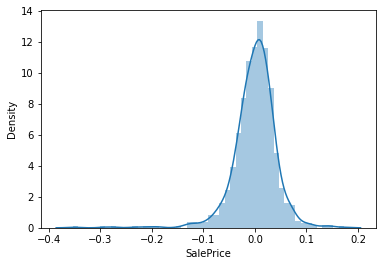

In [204]:
# Checking Residuals 
# residual
y_train_pred = lasso.predict(X_train)
res = y_train-y_train_pred
sns.distplot(res)

### Residual graph is normally distributed

In [205]:
# Find R2 values
print('R2 on train is ' ,r2_score(y_train, y_train_pred))
print('R2 on test is ' ,r2_score(y_test, y_test_pred))

R2 on train is  0.8917950064765755
R2 on test is  0.8864217722138876


In [210]:
# Finding MSE Values 
print('MSE on train is', mean_squared_error(y_test, lasso.predict(X_test)))
print('MSE on test is', mean_squared_error(y_train, lasso.predict(X_train)))

MSE on train is 0.002356010205125628
MSE on test is 0.0017991739084301892


### R2 is little less as compared to Ridge model in Lasso model

In [206]:
Lasso_Dataframe = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
Lasso_Dataframe = Lasso_Dataframe[Lasso_Dataframe['Coefficient'] != 0.00]

Lasso_Dataframe.shape

(36, 2)

### Lasso has done feature selection from 174 to 36.

In [209]:
## Lets find top 15 features from Lasso 


lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
sorted(lasso_coeff_dict.items(), key=lambda x : x[1], reverse=True)

X_train_lasso = X_train[Lasso_Dataframe.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)


Final_15_df_Lasso = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
Final_15_df_Lasso = Final_15_df_Lasso.loc[Final_15_df_Lasso['rfe_support'] == True]
Final_15_df_Lasso.reset_index(drop=True, inplace=True)

Final_15_df_Lasso['Coefficient'] = Final_15_df_Lasso['Features'].apply(find)
Final_15_df_Lasso = Final_15_df_Lasso.sort_values(by=['Coefficient'], ascending=False)
Final_15_df_Lasso

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.1039
2,OverallCond,True,1,0.0931
6,GrLivArea,True,1,0.0919
4,TotalBsmtSF,True,1,0.0719
9,GarageArea,True,1,0.0408
0,LotArea,True,1,0.0395
12,Neighborhood_Crawfor,True,1,0.0334
14,Neighborhood_Somerst,True,1,0.0314
3,BsmtFinSF1,True,1,0.0261
7,KitchenQual,True,1,0.0212


### Top 5 features from Lasso regression model are : OverallQual , OverallCond , GrLivArea, TotalBsmtSF, YearBuilt_Updated

### Final Conclusion :
R2 value for Ridge and Lasso for train and test are 
R2 Rideg train : 0.93046  ,  R2 Rideg test :  0.886421
R2 Lasso train : 0.89179  ,  R2 Lasso test : 0.886421

MSE  value for Ridge and Lasso for train and test are 
MSE Ridge train : 0.00198 ,  MSE Ridge test :  0.001156 
MSE Lasso train : 0.00235  ,  MSE Lasso test : 0.001799


The optimal lambda value in case of Ridge and Lasso is as below:
Ridge - 2
Lasso - 0.001

We can say that Lasso has almost similar R2 values for test and train , almost same MSE as Ridge , Feature elimination to 36 from 174.
Will prefer Lasso over Ridge